In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U matplotlib

Requirement already up-to-date: matplotlib in c:\users\gates\anaconda3\anaconda\lib\site-packages (3.3.3)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import numpy as np
import os

In [5]:
initial_data = yf.download("AMZN ", start="2020-01-01", end="2020-11-30")

[*********************100%***********************]  1 of 1 completed


In [8]:
initial_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,1842.000000,1853.260010,1832.229980,1847.839966,1847.839966,2506500
2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000
2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,1874.969971,3764400
2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,1902.880005,4061800
2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,1906.859985,4044900
...,...,...,...,...,...,...
2020-11-20,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400
2020-11-23,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900
2020-11-24,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100


<AxesSubplot:xlabel='Date'>

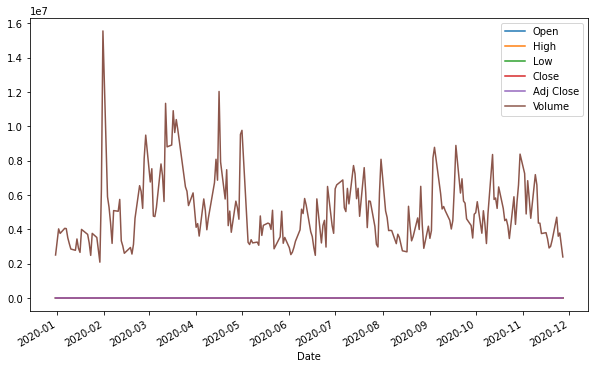

In [12]:
initial_data.plot(figsize=(10, 6))

In [13]:
#HISTORICAL AND MARKET VOLATILITY
#HISTORICAL VOLATILITY

In [16]:
AMZN = initial_data
S = AMZN['Adj Close'][-1]
print('The spot price is $', round(S,2), '.')

The spot price is $ 3195.34 .


In [17]:
log_return = np.log(AMZN['Adj Close'] / AMZN['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 39.81 %


In [ ]:
#MARKET VOLATILITY

In [18]:
print('The market volatility is', round(AMZN['Adj Close'][-1],2) , '% .')

The market volatility is 3195.34 % .


In [5]:
S0 = 3195.0              # spot stock price
K = 3195.0               # strike
T = 1.0                 # maturity 
r = 0.1                 # risk free rate 
sigma = 0.2               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [6]:
import numpy as np
import os

In [7]:
dT = float(T) / N                             # Delta t
u = np.exp(sigma * np.sqrt(dT))               # up factor
d = 1.0 / u                                   # down factor 

In [8]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [9]:
S

array([[3195.        , 3586.07088331, 4025.00919567, 4517.67395357],
       [   0.        , 2846.57647106, 3195.        , 3586.07088331],
       [   0.        ,    0.        , 2536.14948532, 2846.57647106],
       [   0.        ,    0.        ,    0.        , 2259.57541534]])

In [10]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.6176090164403981

In [11]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 348.42352894],
       [  0.        ,   0.        ,   0.        , 935.42458466]])

In [12]:
#EUROPEAN OPTION

In [13]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[132.74009832,  47.66172939,   0.        ,   0.        ],
       [  0.        , 281.91832403, 128.86608534,   0.        ],
       [  0.        ,   0.        , 554.10595572, 348.42352894],
       [  0.        ,   0.        ,   0.        , 935.42458466]])

In [14]:
print('European ' + payoff, str( V[0,0]))

European put 132.7400983184326


In [15]:
#AMERICAN OPTION

In [16]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[157.33736199,  47.66172939,   0.        ,   0.        ],
       [  0.        , 348.42352894, 128.86608534,   0.        ],
       [  0.        ,   0.        , 658.85051468, 348.42352894],
       [  0.        ,   0.        ,   0.        , 935.42458466]])

In [17]:
print('American ' + payoff, str( V[0,0]))

American put 157.33736199247295


In [18]:
#MONTE CARLO SIMULATION

In [19]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [20]:
S0 = 3195.0              # spot stock price
K = 3195.0               # strike
T = 1.0                 # maturity 
r = 0.1                 # risk free rate 
sigma = 0.2               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [21]:
S = mcs_simulation_np(1000)

In [22]:
S = np.transpose(S)
S

array([[3195.        , 3213.1493644 , 3233.72741688, ..., 3843.57397026,
        3823.38103995, 3859.20845564],
       [3195.        , 3183.22885788, 3196.1576076 , ..., 3175.86809531,
        3182.28621575, 3162.72758742],
       [3195.        , 3203.33312103, 3218.23829281, ..., 3720.15534183,
        3692.29309047, 3660.08367179],
       ...,
       [3195.        , 3244.20072843, 3215.47524716, ..., 2801.82296469,
        2789.306812  , 2773.15874587],
       [3195.        , 3202.24748271, 3214.42302991, ..., 3065.93906422,
        3073.79080112, 3079.18599858],
       [3195.        , 3201.84981782, 3185.93466667, ..., 4321.17729644,
        4371.30403913, 4374.20359521]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

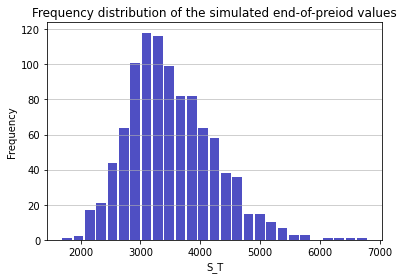

In [23]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [24]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 135.23609548381958


In [25]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 460.99766416601625


In [26]:
#VEGA 

In [29]:
import scipy.stats as si

In [30]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [31]:
vega(3195.0, 3195.0, 1, 0.05, 0.03, 0.25, 'call')

1211.2296153209397

In [32]:
vega(3195.0, 3195.0, 1, 0.05, 0.03, 0.25, 'put')

1211.2296153209397

In [34]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(3195, 3195, 1, 0.05, 0.03, vol[i], 'call')

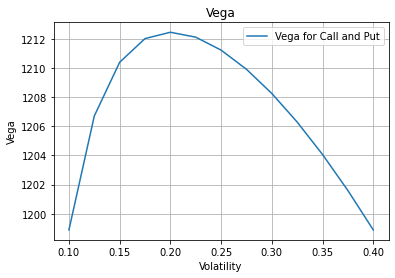

In [35]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

In [36]:
#RHO

In [37]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [38]:
rho(3195.0, 3195.0, 1, 0.05, 0.03, 0.25, 'call')

1465.0468669461764

In [39]:
rho(3195.0, 3195.0, 1, 0.05, 0.03, 0.25, 'put')

-1574.131144333605

In [40]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(3195, 100, 1, r[i], 0.03, 0.25, 'call')
    Rho_Put [i] = rho(3195, 100, 1, r[i], 0.03, 0.25, 'put')

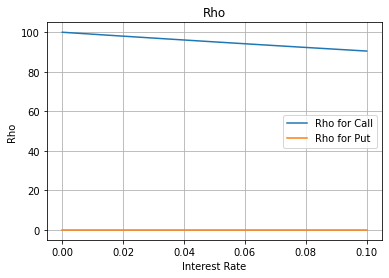

In [41]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [42]:
#THETA

In [43]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [45]:
theta(3195.0, 3195.0, 1, 0.05, 0.03, 0.25, 'call')

170.59314964447665

In [46]:
theta(3195.0, 3195.0, 1, 0.05, 0.03, 0.25, 'put')

191.1559503591228

In [47]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(3195, 3195, T[i], 0.05, 0.03, 0.25, 'call')
    Theta_Put [i] = theta(3195, 3195, T[i], 0.05, 0.03, 0.25, 'put')

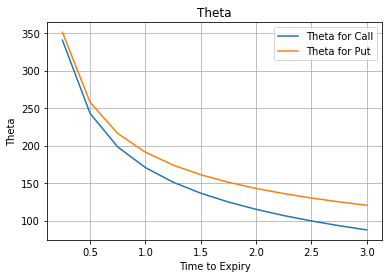

In [48]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

In [49]:
#GAMMA

In [50]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * T)
    
    return gamma

In [51]:
gamma(3195.0, 3195.0, 1, 0.05, 0.03, 0.25, 'call')

0.00046522051503887843

In [52]:
gamma(3195.0, 3195.0, 1, 0.05, 0.03, 0.25, 'put')

0.00046522051503887843

In [56]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 3195, 1, 0.05, 0.03, 0.25, 'call')

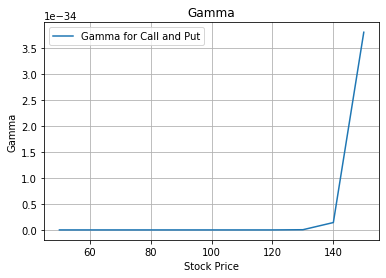

In [57]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [58]:
#SPEED

In [59]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * T) * (d1 + vol * np.sqrt(T))
    
    return speed

In [60]:
speed(3195, 3195, 1, 0.05, 0.03, 0.25, 'call')

2.703617649415006e-07

In [61]:
speed(3195, 3195, 1, 0.05, 0.03, 0.25, 'put')

2.703617649415006e-07

In [62]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 3195, 1, 0.05, 0.03, 0.25, 'call')

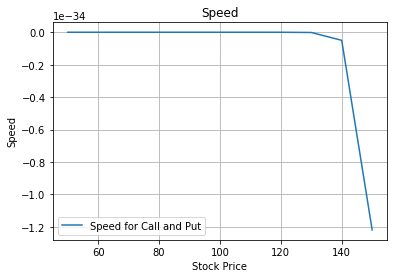

In [63]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])